# Comparing Analytical and Numerical Solution Solver

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from time import time
from lib.Model import *
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}",
    "lines.linewidth": 1
})

In [122]:
N = 300
Ntest = 10
Npoints = [i*10 for i in range(1,N+1)]
Duration_numerical = np.zeros(N)
Duration_analytical = np.zeros(N)
progress_bar = IntProgress(max=N)
display(progress_bar)

(k1, k2, k3) = (10.0, 20.0, 30.0)
(m1, m2)     = (1.0, 1.0)
(x1_i,x2_i)  = (-1,1)
(v1_i,v2_i)  = (-2,2)

for i in range(N):
    duration_numerical = 0.0
    duration_analytical = 0.0
    for j in range(Ntest):
        t = np.linspace(0,1, Npoints[i])
        start = time()
        Numerical_Model(t, k=(k1, k2, k3),m=(m1, m2),x1_i=x1_i,x2_i=x2_i,v1_i=v1_i,v2_i=v2_i)
        duration_numerical += time()-start 
        start = time()
        Analytical_Model(t, k=(k1, k2, k3),m=(m1, m2),x1_i=x1_i,x2_i=x2_i,v1_i=v1_i,v2_i=v2_i)
        duration_analytical += time()-start 
    Duration_numerical[i] = duration_numerical/Ntest
    Duration_analytical[i] = duration_analytical/Ntest
    
    progress_bar.value = i+1
    progress_bar.description = str((((i+1)*100)//N))+"%"

IntProgress(value=0, max=300)

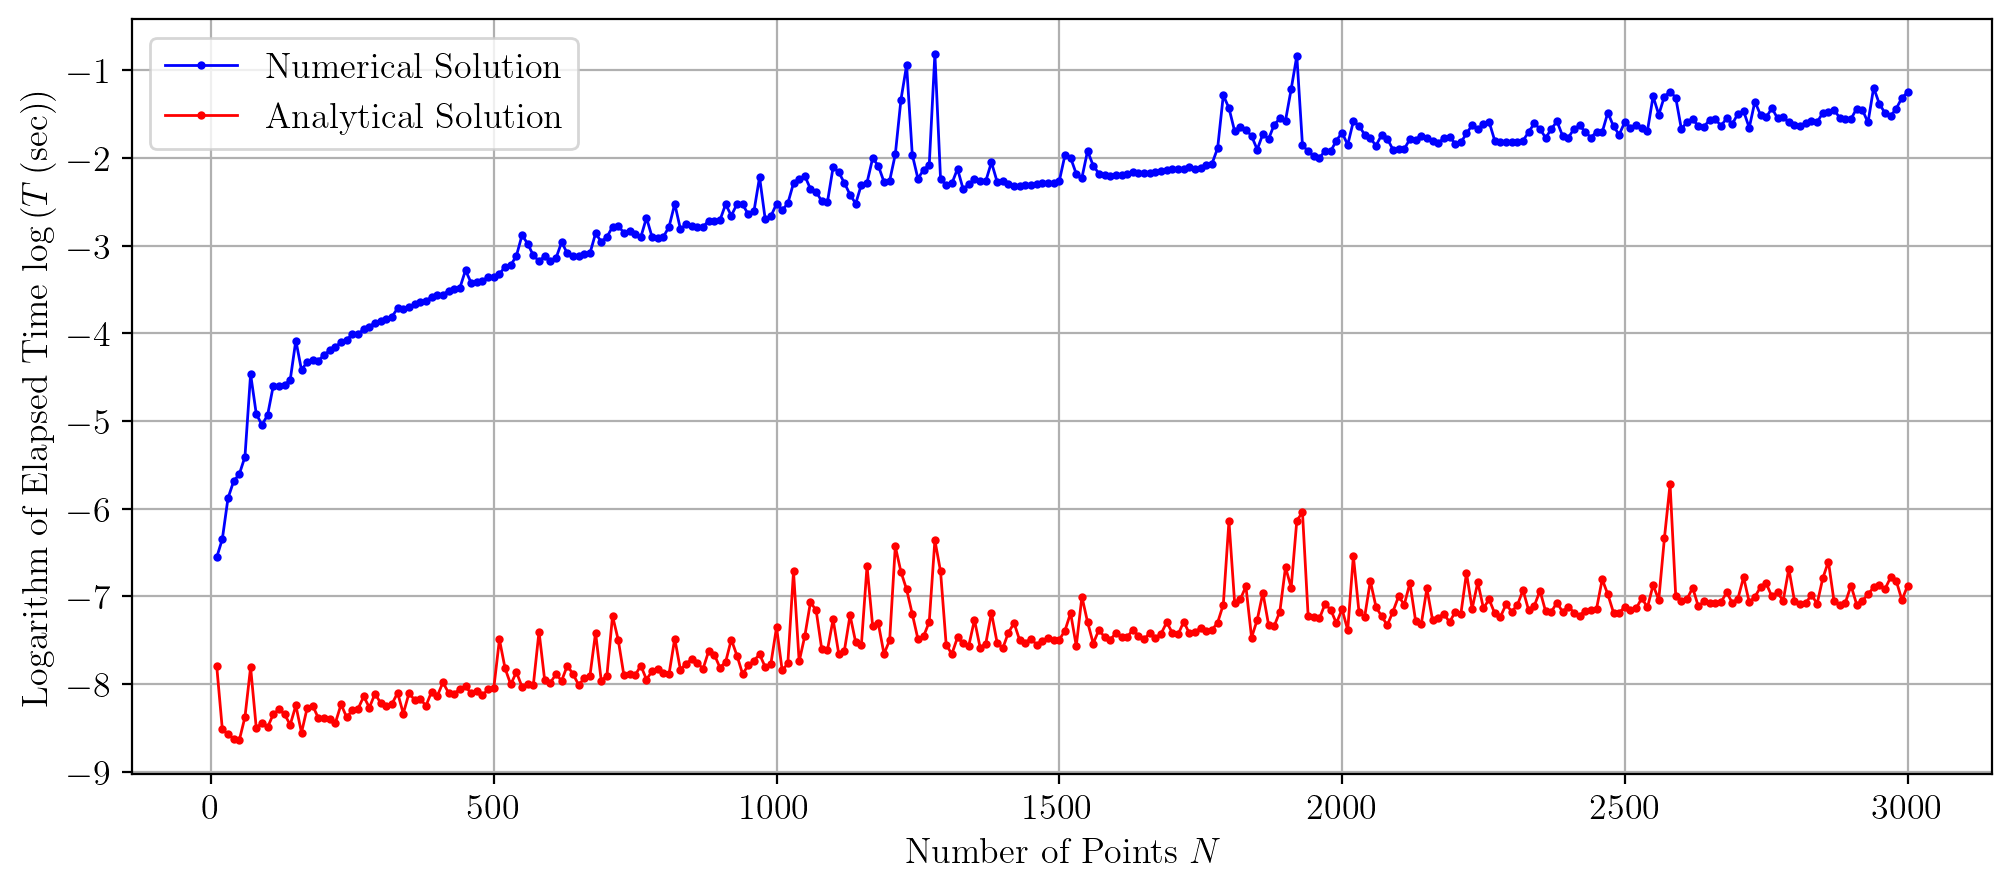

In [126]:
fig = plt.figure(figsize=(12,5),dpi=200)
plt.plot(Npoints, np.log(Duration_numerical),
         "-o",color='blue',markersize=2,
         label="Numerical Solution")
plt.plot(Npoints, np.log(Duration_analytical),
         "-o",color='red',markersize=2,
         label="Analytical Solution")
plt.xlabel(r"Number of Points $N$")
plt.ylabel(r"Logarithm of Elapsed Time $\log\left(T\,{\rm{(sec)}}\right)$")
plt.legend()
plt.grid()
plt.show()
fig.savefig("img/Elapsed_Time.pdf")